In [2]:
# Import necessary libraries
import pandas as pd                     # For data manipulation
import seaborn as sns                   # For pairwise visualization
import matplotlib.pyplot as plt         # For plotting
from sklearn.linear_model import LinearRegression  # Linear regression model
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.preprocessing import StandardScaler   # For feature scaling
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Step 1: Load dataset
data = pd.read_csv('dataset.csv')  # Assumes the file 'dataset.csv' is in the current directory


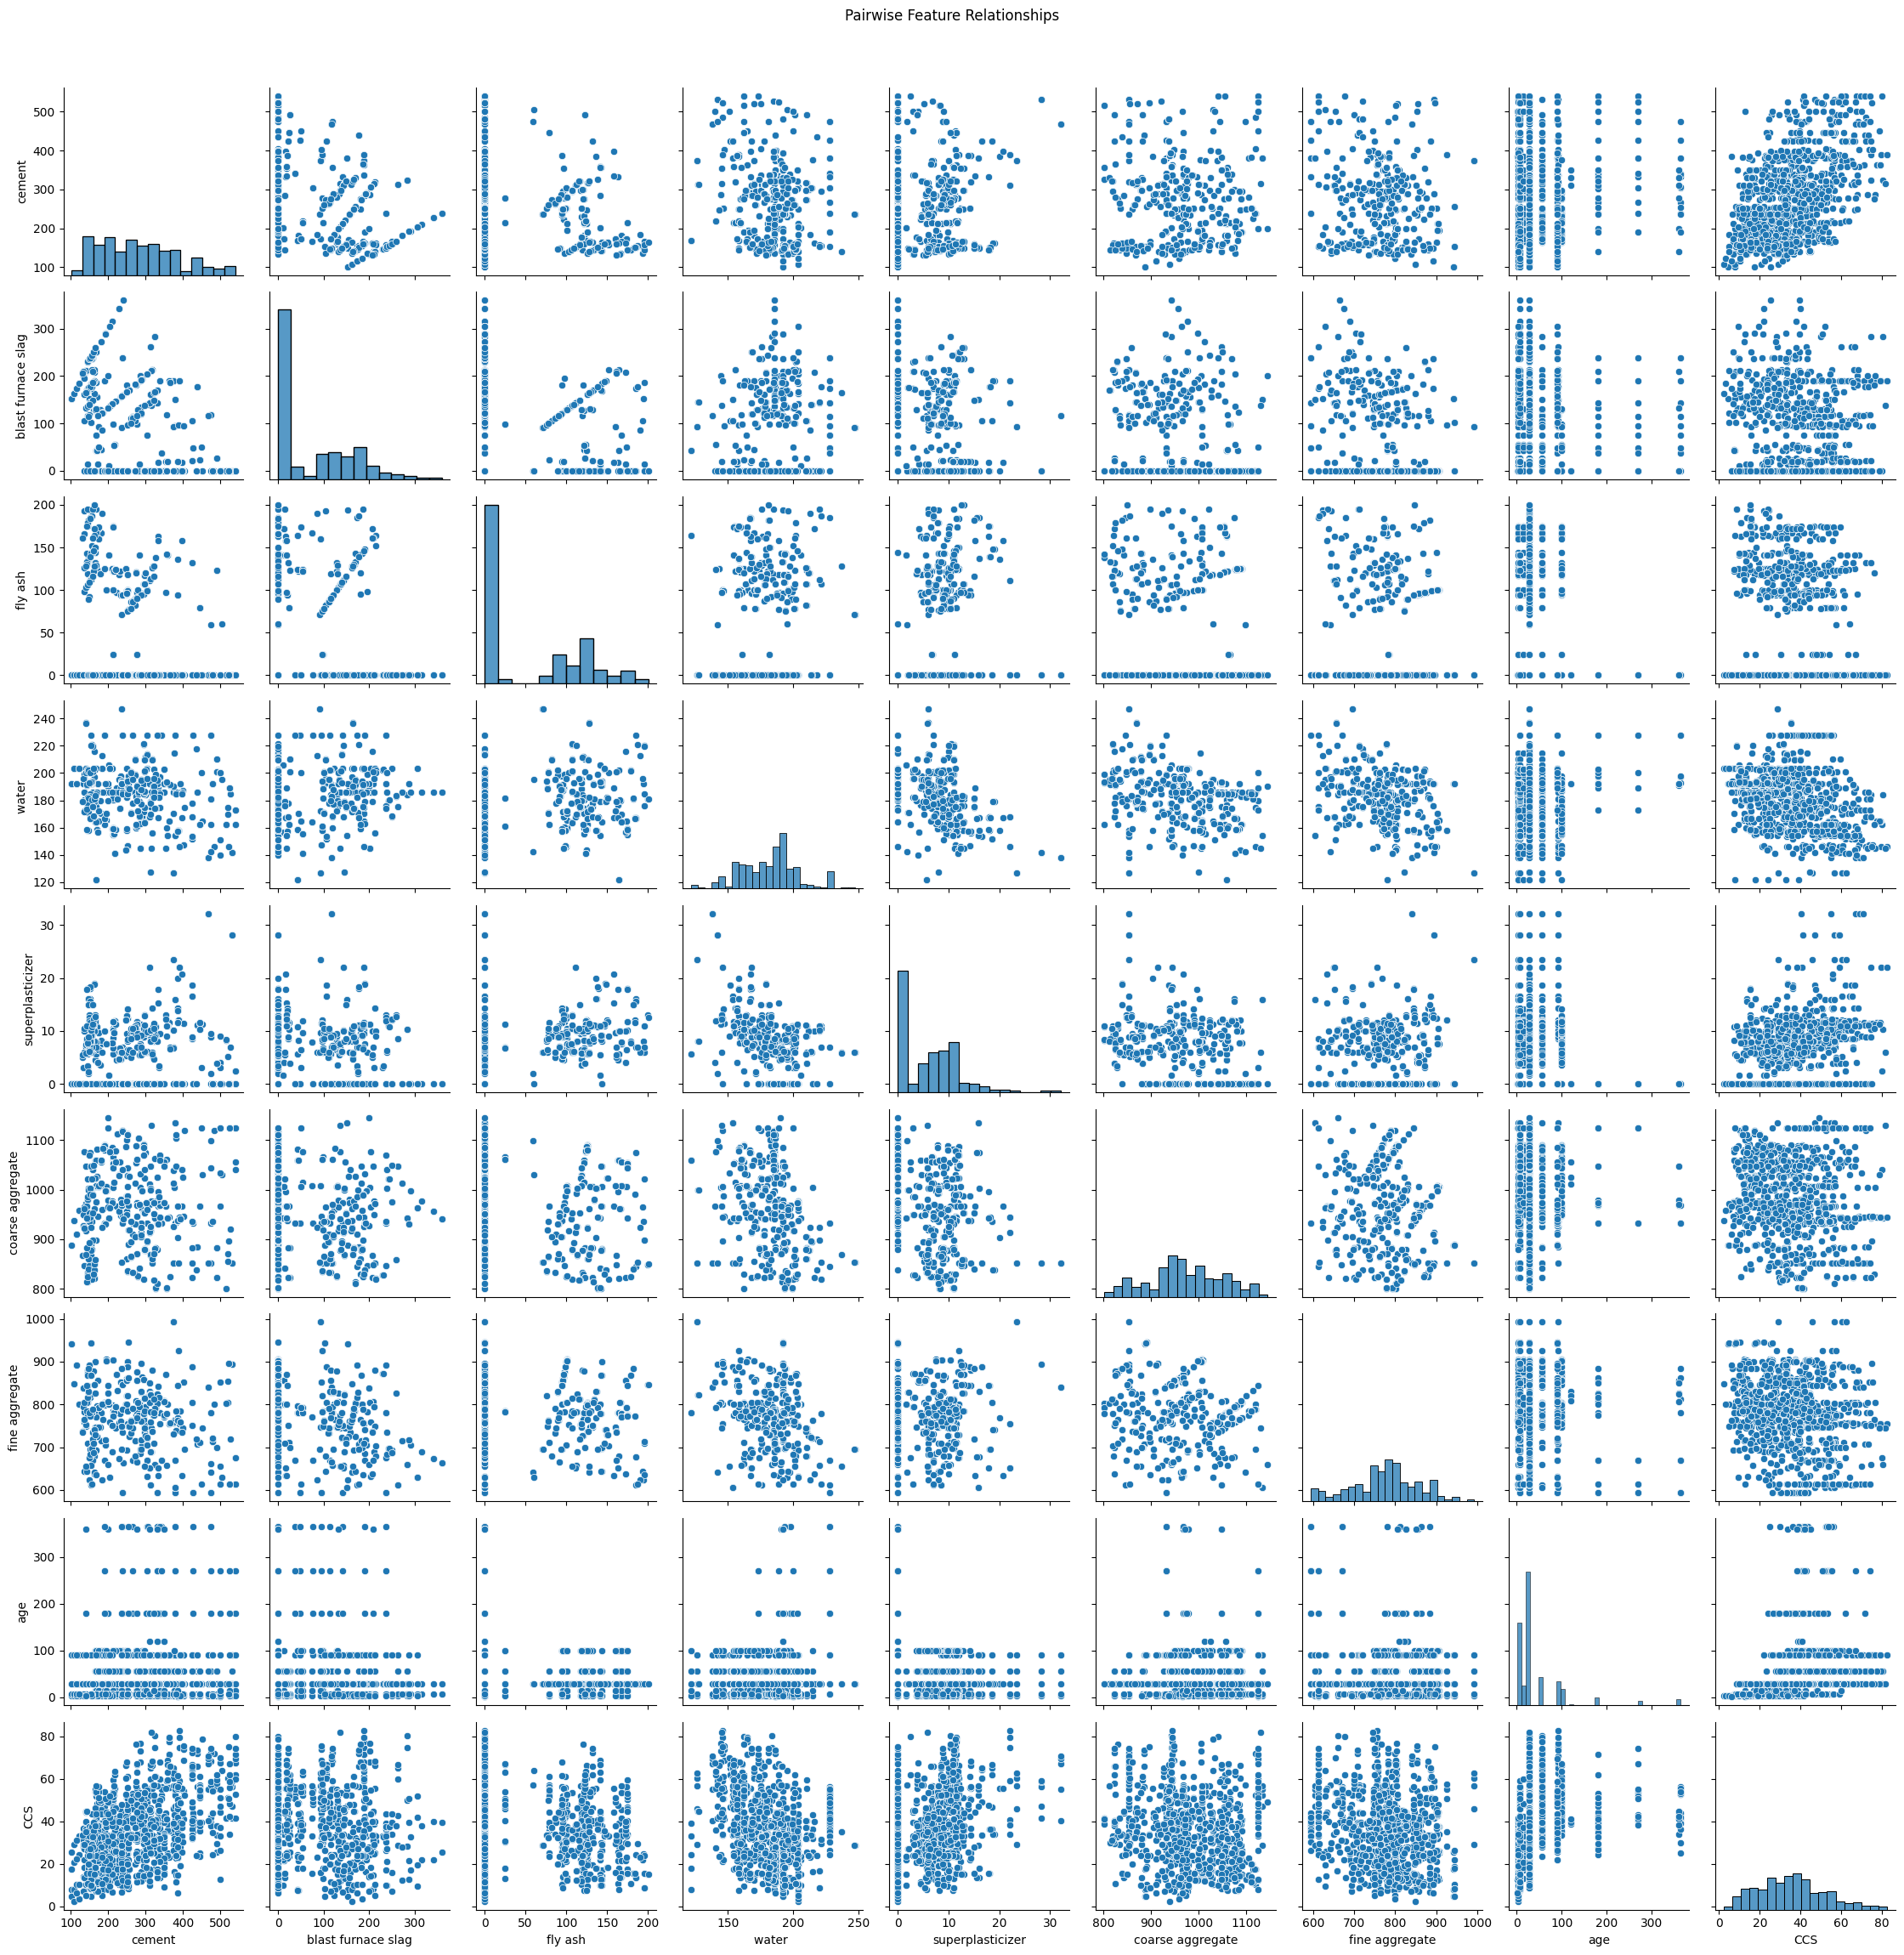

In [3]:
# Step 2: Explore data visually
# This shows scatter plots for each pair of features and the target variable
sns.pairplot(data) # -> Î™®Îì† factorÏùò ÏÇ∞Ï†êÎèÑ Í∑∏Î¶º
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.tight_layout()
plt.show()

In [4]:
# Step 3: Separate features and target variable
X = data.drop(columns=['CCS']).values  # Feature matrix: 'CCS' ÎπºÍ≥† Î™®Îì† column
y = data['CCS'].values                 # Target vector: 'CCS' column


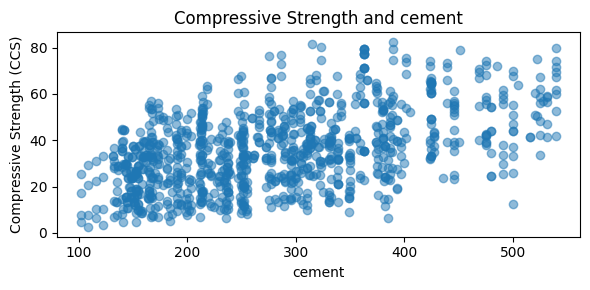

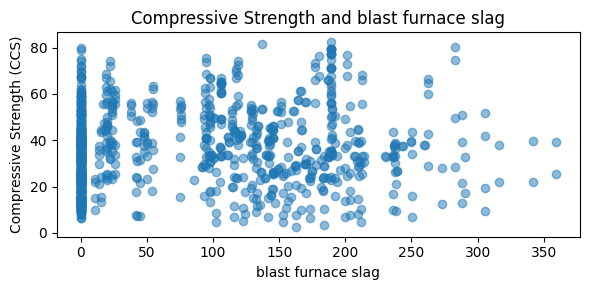

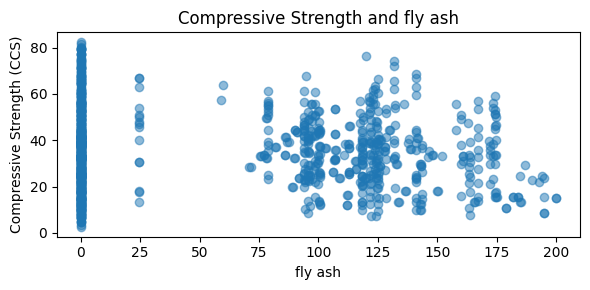

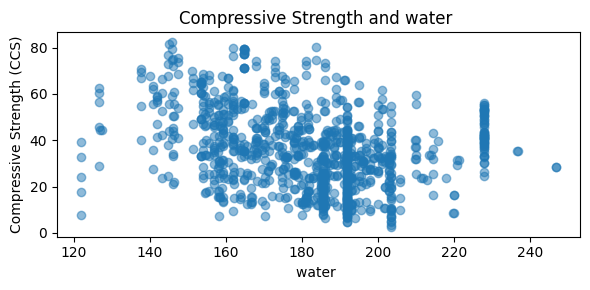

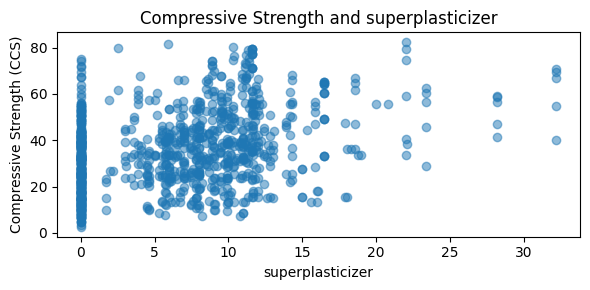

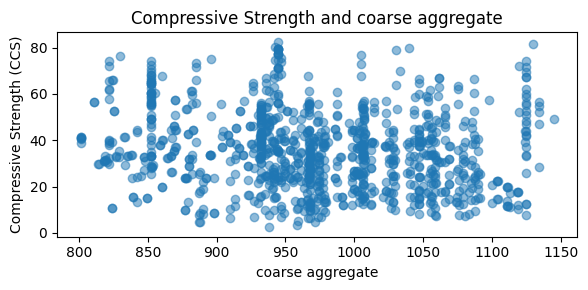

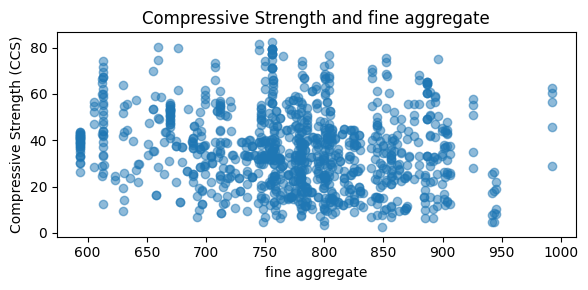

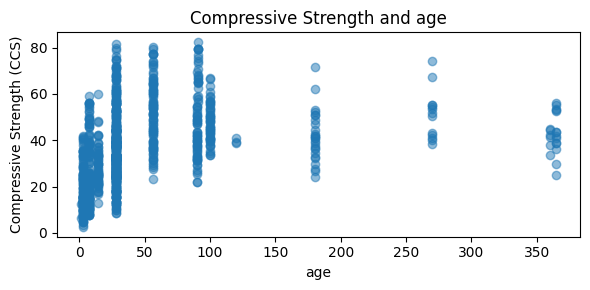

In [5]:
# CCSÏùò ÏôÄÏùò Í¥ÄÍ≥ÑÎßå Î≥¥Îäî ÏÇ∞Ï†êÎèÑ Í∑∏Î†§Î≥¥Í∏∞
feature_names = data.drop(columns=['CCS']).columns  # Ïª¨ÎüºÎ™Ö(Î¶¨Ïä§Ìä∏)

for i, feature in enumerate(feature_names):
    plt.figure(figsize=(6, 3))
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Compressive Strength (CCS)')
    plt.title(f'Compressive Strength and {feature}')
    plt.tight_layout()
    plt.show()

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor  # üí° Í≤∞Ï†ï Ìä∏Î¶¨ ÌöåÍ∑Ä Î™®Îç∏
from sklearn.metrics import mean_squared_error, r2_score

# Step 4: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Step 5: Standardize features (ÏÑ†ÌÉùÏÇ¨Ìï≠Ïù¥ÏßÄÎßå Ïú†ÏßÄ)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Create and train Decision Tree regression model
reg_model = DecisionTreeRegressor(random_state=42,max_depth=1000)  # CatBoost ÎåÄÏã† Ïù¥Í±∞!
reg_model.fit(X_train_scaled, y_train)

# Step 7: ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = reg_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R¬≤ Score:", r2)

MSE: 42.58102330097088
R¬≤ Score: 0.8347503240203619


CarBoostÎäî Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïóê Í∞ïÌïú Gradient Boosting_based Model
Learning rate : Î®∏Ïã†Îü¨Îãù Î™®Îç∏(ÌäπÌûà Gradient Boosting Í≥ÑÏó¥ Î™®Îç∏)Îì§Ïù¥ ÌïôÏäµÌï† Îïå ÌïôÏäµ ÏÜçÎèÑÎ•º Í≤∞Ï†ïÌïòÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
- Î™®Îç∏Ïù¥ errorÎ•º Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏ Ìï† Îïå, Í∑∏ ÌÅ¨Í∏∞Î•º Ï°∞Ï†àÌïòÎäî ÎπÑÏú®
Learning rate = 0.1 -> Í∞Å treeÍ∞Ä Ï†ÑÏ≤¥ Î™®Îç∏Ïóê 10%Îßå Í∏∞Ïó¨
model.fit(X, Y)Îäî Î™®Îç∏Ïù¥ X(ÏûÖÎ†•)ÏôÄ Y(Ï†ïÎãµ)Î•º Î≥¥Í≥† Í∑úÏπô(ÏòàÏ∏°ÌïòÎäî Îä•Î†•)ÏùÑ Î∞∞Ïö∞Í≤å Ìï® = Î™®Îç∏ ÌïôÏäµ

In [ ]:
# Step 7: Predict on training and test sets
y_train_pred = reg_model.predict(X_train_scaled) # Í≤∞Í≥º ÏòàÏ∏° Ìï®Ïàò
y_test_pred = reg_model.predict(X_test_scaled)

# Step 8: Evaluate model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Train R¬≤ Score: {r2_train:.3f}")
print(f"Test R¬≤ Score: {r2_test:.3f}")
print(f"Test MSE: {mse_test:.3f}")

# Step 9: Parity plot (Actual vs Predicted)
min_val = min(y.min(), y_train_pred.min(), y_test_pred.min())
max_val = max(y.max(), y_train_pred.max(), y_test_pred.max())
# X, Y Ï∂ï Î≤îÏúÑ ÏßÄÏ†ï -> minÍ≥º maxÎ°ú

Train R¬≤ Score: 0.993
Test R¬≤ Score: 0.938
Test MSE: 15.948


*Í≤∞Ï†ïÍ≥ÑÏàò(R^2)
= 1- (Ïã§Ï†ú-ÏòàÏ∏°Í∞í)^2/(Ïã§Ï†ú-ÌèâÍ∑†)^2
- 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏôÑÎ≤ΩÌïú ÏòàÏ∏°

*MSE (Mean squared Error)
- ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞íÏùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
- Ïà´ÏûêÍ∞Ä ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå

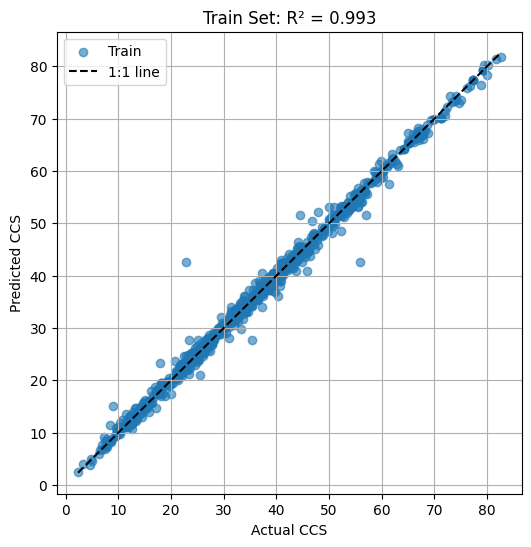

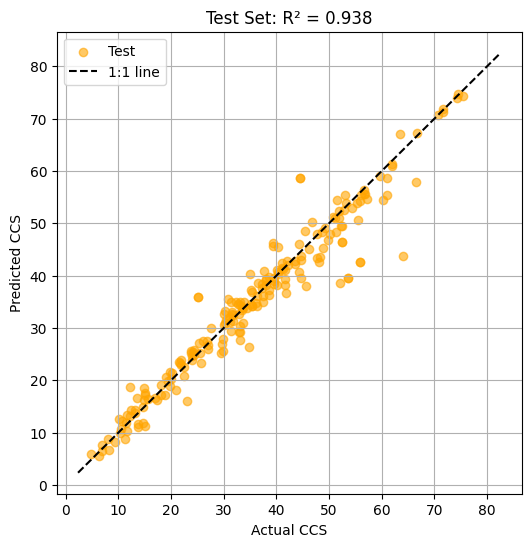

In [ ]:
# Training plot
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, label='Train') #ÏÇ∞Ï†êÎèÑ
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line') # 45ÎèÑ ÎåÄÍ∞ÅÏÑ† -> Ï†êÎì§Ïù¥ Ïó¨Í∏∞Ïóê Î™∞Î†§ÏûàÏúºÎ©¥ Ï†ïÌôïÌïú ÏòàÏ∏°Ïù∏Í±∞ÏûÑ
plt.xlabel('Actual CCS')
plt.ylabel('Predicted CCS')
plt.title(f'Train Set: R¬≤ = {r2_train:.3f}')
plt.legend() # Î≤îÎ°Ä ÌëúÏãú
plt.grid(True)
plt.show()

# Test plot -> ÏùºÎ∞òÌôî ÏÑ±Îä•Ïù¥ ÏñºÎßàÎÇò Ï¢ãÏùÄÏßÄ ÎààÏúºÎ°ú ÌôïÏù∏ Í∞ÄÎä•
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='orange', label='Test')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')
plt.xlabel('Actual CCS')
plt.ylabel('Predicted CCS')
plt.title(f'Test Set: R¬≤ = {r2_test:.3f}')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## Grid Search Ìï¥Î≥¥Í∏∞ + five-fold CVÎ•º Í≥ÅÎì§Ïù∏
# Step 1 : Parameter Grid Ï†ïÏùòÌïòÍ∏∞
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 1000, 1500]
}

# Step 2 : Model Ï†ïÏùò 
model = CatBoostRegressor(verbose=0, random_state=42) # verbos=0ÏùÄ train Ï§ë log ÏïàÎÇòÏò§Í≤å ÏÑ§Ï†ï

#  Step 3 : Grid SearchCV Ï§ÄÎπÑ
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                        # 5-Fold cross Validation
    scoring='r2',                # R¬≤ Ï†êÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌèâÍ∞Ä -> R^2 Ï†êÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Î™®Îç∏ÏùÑ Ï∞æÏùå
    n_jobs=-1                    # Î™®Îì† CPU ÏΩîÏñ¥ ÏÇ¨Ïö© (Îπ†Î•¥Í≤å Ï≤òÎ¶¨)
)

# Step 4 : Grid Search Ïã§ÌñâÌïòÍ∏∞ (Train)
grid_search.fit(X_train_scaled, y_train)

# Step 5 : Í≤∞Í≥º ÌôïÏù∏ÌïòÍ∏∞
print("Best Parameters:", grid_search.best_params_)
print("Best R¬≤ Score (CV avg):", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.05, 'n_estimators': 1500}
Best R¬≤ Score (CV avg): 0.9367743775021931
